# Standard Reservoir Computer 

### (graphical comparison between the Lyapunov exponents of the RC and those of the true system)

### $\rho \in \lbrack \rho_{from},\rho_{to} \rbrack$

In [1]:
# Import libraries
import math     as m
import numpy    as np
import matplotlib.pyplot as plt  
import pandas   as pd
import time     as time

#######################################################################
# E N V I R O N M E N T   S E T   U P
#######################################################################
#---------------------------------------------------------------------#
# To compute elapsed time
#---------------------------------------------------------------------#
start_time = time.time()

In [2]:
#######################################################################
# M A I N   P A R A M E T E R S
#######################################################################

D = 3

rho_from,rho_to = 99.524, 330

txt_range = '099524_330'

N = 400


In [3]:
#######################################################################
# R. C .  L Y A P U N O V   E X P O N E N T S   L I S T
#######################################################################
txt_seed = 'seed42' 
df_RC_LE = pd.read_csv('climate/df_RC' + str(N) + '_' + txt_seed + '_LE_PAPER.csv',delimiter=";",index_col=False)

df_RC_LE = df_RC_LE[(df_RC_LE['rho_Lorenz'] >= rho_from) & (df_RC_LE['rho_Lorenz'] <= rho_to)] 

len_df_RC_LE = len(df_RC_LE)

rho_list = df_RC_LE.rho_Lorenz

#print(df_RC_LE)

In [4]:
#######################################################################
# T R U E   S Y S T E M    L Y A P U N O V   E X P O N E N T S   L I S T
#######################################################################
df_True_LE = pd.read_csv('climate/df_True_LE_x_PAPER.csv',delimiter=";",index_col=False)

df_True_LE = df_True_LE[(df_True_LE['rho_Lorenz'] >= rho_from) & (df_True_LE['rho_Lorenz'] <= rho_to)] 

len_df_True_LE = len(df_True_LE)


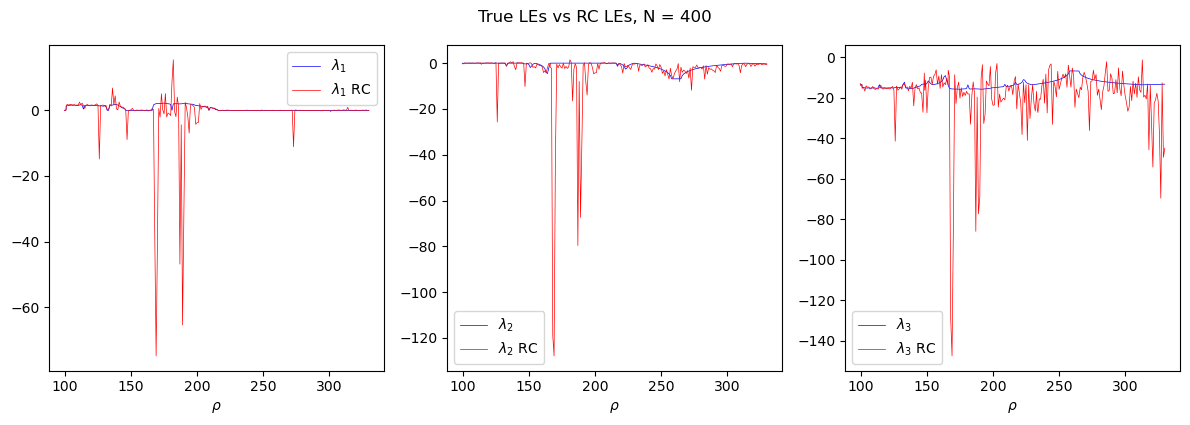

In [5]:
# Plot Lorenz variables (test and predicted dataset)
fig, axs = plt.subplots(1, 3, figsize=(12,4))  

axis_true_label = ["$\lambda_1$"     ,"$\lambda_2$"     ,"$\lambda_3$"     ]
axis_pred_label = ["$\lambda_1$ RC"     ,"$\lambda_2$ RC"     ,"$\lambda_3$ RC"     ]

for i in range(D):
    axs[i].plot(rho_list, df_True_LE.iloc[:, [i+1]] , label= axis_true_label[i], color='blue', lw = 0.5)
    axs[i].plot(rho_list, df_RC_LE.iloc[:, [i+1]] , label= axis_pred_label[i], color='red' , lw = 0.5)
    # Shrink current axis by 20%
    box = axs[i].get_position()
    #
    axs[i].set_xlabel("$\\rho$") #\\rho need to prevent parsing error!!!
    axs[i].legend()#(loc='center left', bbox_to_anchor=(1, 0.5))
fig.tight_layout()
fig.suptitle('True LEs vs RC LEs, N = ' + str(N), y=1.05)

plt.savefig('climate/' + txt_seed + '_LE_zoom_' + txt_range + '_noCLE_small_N' + str(N) + '.png',bbox_inches='tight')

plt.show()

plt.close(fig)

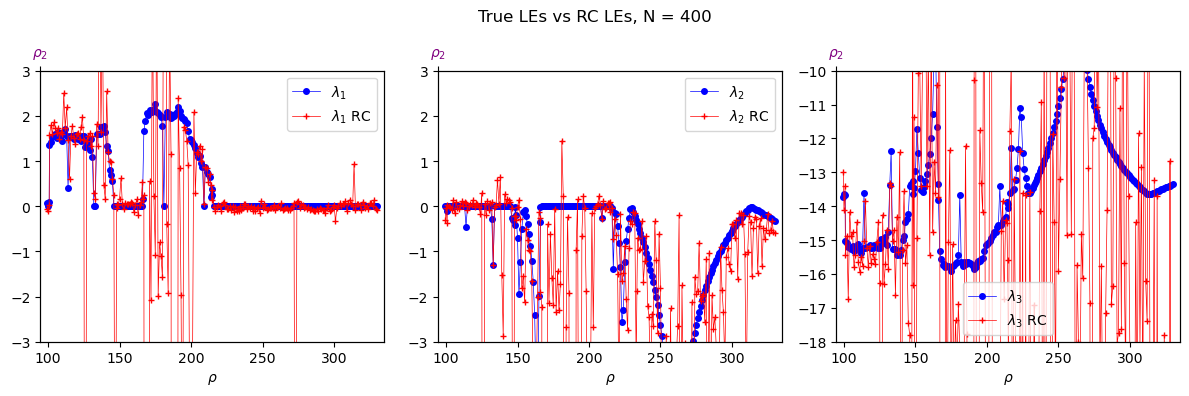

In [6]:
# Plot Lorenz variables (test and predicted dataset)
fig, axs = plt.subplots(1, 3, figsize=(12,4))  

axis_true_label = ["$\lambda_1$"     ,"$\lambda_2$"     ,"$\lambda_3$"     ]
axis_pred_label = ["$\lambda_1$ RC"     ,"$\lambda_2$ RC"     ,"$\lambda_3$ RC"     ]

for i in range(D):
    axs[i].plot(rho_list, df_True_LE.iloc[:, [i+1]] , label= axis_true_label[i], color='blue',marker='o',markersize=4, lw = 0.5)
    axs[i].plot(rho_list, df_RC_LE.iloc[:, [i+1]] , label= axis_pred_label[i], color='red' ,marker='+',markersize=4, lw = 0.5)
    if i in [0,1]:
         axs[i].set_ylim(-3, 3)
    if i==2:
         axs[i].set_ylim(-18, -10)
    # Shrink current axis by 20%
    box = axs[i].get_position()
    #
    axs[i].set_xlabel("$\\rho$") #\\rho need to prevent parsing error!!!
    axs[i].legend()#(loc='center left', bbox_to_anchor=(1, 0.5))

    #axs[i].axvline(x = 13.926667, color = 'grey')
    axs[i].axvline(x = 24.058, color = 'grey')

    axs[i].set_xlim(rho_from - 5,rho_to + 5)
    ax2 = axs[i].twiny()
    ax2.set_xlim(rho_from - 5,rho_to + 5)
    #
    ax2.set_xticks([24.058])
    ax2.set_xticklabels(['$\\rho_2$'],color='purple')
    #ax2.set_xticklabels(['$\\rho_H$','$\\rho_a =23.9$','166.07','313'],color='purple',fontsize=8,ha='left')
    
fig.suptitle('True LEs vs RC LEs, N = ' + str(N))
fig.tight_layout()

plt.savefig('climate/' + txt_seed + '_LE_zoom_' + txt_range + '_noCLE_small_ylim_N' +str(N) + '.png',bbox_inches='tight')

plt.show()

plt.close(fig)

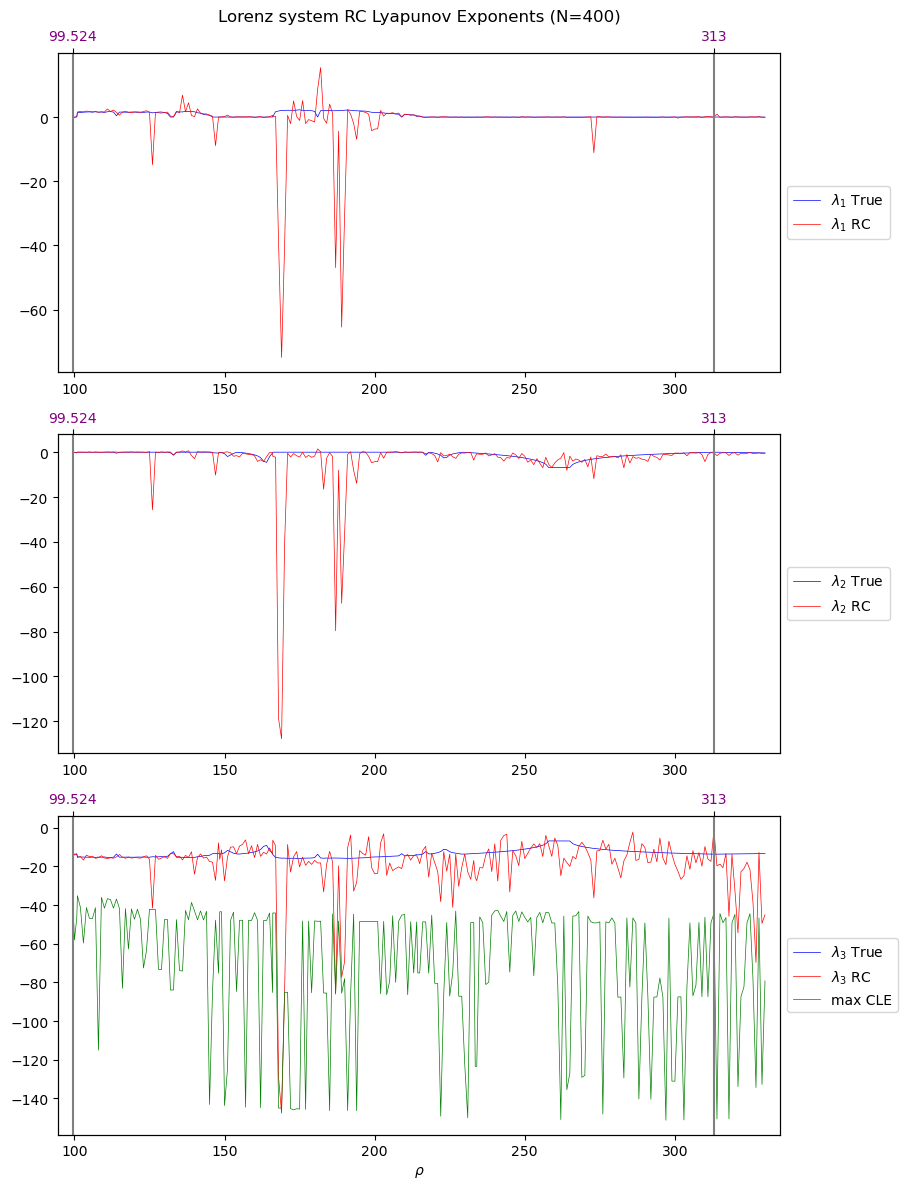

In [7]:
# Plot Lorenz system Lyapunov Exponents
fig, axs = plt.subplots(3, 1, figsize=(8, 12))  

axis_test_label_t = ["$\lambda_1$ True","$\lambda_2$ True","$\lambda_3$ True"]
axis_test_label   = ["$\lambda_1$ RC"  ,"$\lambda_2$ RC"  ,"$\lambda_3$ RC"  ]
axs[0].set_title("Lorenz system RC Lyapunov Exponents (N=" + str(N) + ")")

for i in range(D):
    axs[i].plot(rho_list, df_True_LE.iloc[:, [i+1]] , label= axis_test_label_t[i], color='blue' , lw = 0.5)
    axs[i].plot(rho_list, df_RC_LE.iloc[:, [i+1]] , label= axis_test_label[i], color='red' , lw = 0.5)
    if i==2:
        axs[i].plot(rho_list, df_RC_LE.iloc[:, [i+2]] , label= "max CLE", color='green' , lw = 0.5)

    #
    # Shrink current axis by 20%
    box = axs[i].get_position()
    axs[i].set_position([box.x0, box.y0, box.width * 0.8, box.height])
    # Put a legend to the right of the current axis
    axs[i].legend(loc='center left', bbox_to_anchor=(1, 0.5))

    #axs[i].axvline(x = 13.926667, color = 'grey')
    #axs[i].axvline(x = 23.9     , color = 'grey')
    #axs[i].axvline(x = 24.058   , color = 'grey')
    #axs[i].axvline(x = 470./19. , color = 'grey')
    #axs[i].axvline(x = 30.485   , color = 'grey')
    
    axs[i].axvline(x = 99.524   , color = 'grey')
    #axs[i].axvline(x = 100.795  , color = 'grey')
    #axs[i].axvline(x = 148.4    , color = 'grey')
    #axs[i].axvline(x = 166.07   , color = 'grey')
    #axs[i].axvline(x = 214.364  , color = 'grey')
    #axs[i].axvline(x = 233.5    , color = 'grey')
    axs[i].axvline(x = 313      , color = 'grey')
    #axs[i].axvline(x = 75, color = 'grey')
    axs[i].set_xlim(rho_from - 5,rho_to + 5)

    ax2 = axs[i].twiny()
    ax2.set_xlim(rho_from - 5,rho_to + 5)
    #
    ax2.set_xticks([99.524,313])
    ax2.set_xticklabels(['99.524','313'],color='purple')

    #if i==0:
    #    ax2 = axs[i].twiny()
    #    ax2.set_xlim(-5, 335)
    #    ax2.set_xticks([13.926667,23.9,166.07, 313])
    #    #ax2.set_xticklabels(['$\\rho_H$','$\\rho_a =23.9$','166.07','313'],color='purple',fontsize=8,ha='left')
    #    ax2.set_xticklabels(['$\\rho_H$','$\\rho_a$','166.07','313'],color='purple')
    
    
axs[2].set_xlabel("$\\rho$") #\\rho need to prevent parsing error!!!
fig.tight_layout()

plt.savefig('climate/' + txt_seed + '_LE_zoom_' + txt_range + '_N' + str(N) + '.png',bbox_inches='tight')

plt.show()

plt.close(fig)

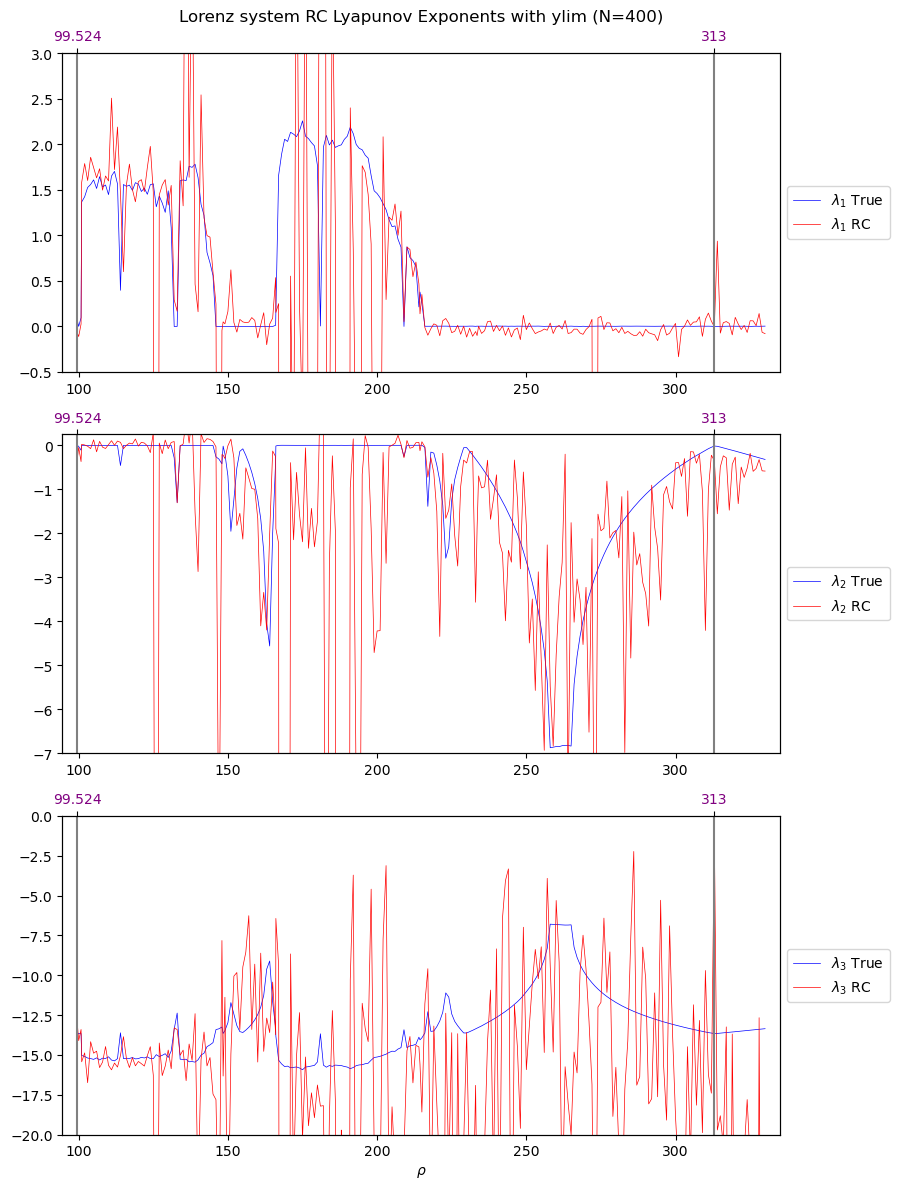

In [8]:
# Plot Lorenz system Lyapunov Exponents
fig, axs = plt.subplots(3, 1, figsize=(8, 12))  

axis_test_label_t = ["$\lambda_1$ True","$\lambda_2$ True","$\lambda_3$ True"]
axis_test_label   = ["$\lambda_1$ RC"  ,"$\lambda_2$ RC"  ,"$\lambda_3$ RC"  ]
axs[0].set_title("Lorenz system RC Lyapunov Exponents with ylim (N=" + str(N) + ")")

for i in range(D):
    axs[i].plot(rho_list, df_True_LE.iloc[:, [i+1]] , label= axis_test_label_t[i], color='blue' , lw = 0.5)
    axs[i].plot(rho_list, df_RC_LE.iloc[:, [i+1]] , label= axis_test_label[i], color='red' , lw = 0.5)
    #axs[i].set_ylim(-20, 5)
    if i==0:
       axs[i].set_ylim(-0.5, 3)
    if i==1:
       axs[i].set_ylim(-7, 0.25)
    if i==2:
       axs[i].set_ylim(-20,0)
    #
    # Shrink current axis by 20%
    box = axs[i].get_position()
    axs[i].set_position([box.x0, box.y0, box.width * 0.8, box.height])
    # Put a legend to the right of the current axis
    axs[i].legend(loc='center left', bbox_to_anchor=(1, 0.5))

    #axs[i].axvline(x = 13.926667, color = 'grey')
    #axs[i].axvline(x = 24.058   , color = 'grey')
    #axs[i].axvline(x = 470./19. , color = 'grey')
    #axs[i].axvline(x = 30.485   , color = 'grey')
    
    axs[i].axvline(x = 99.524   , color = 'grey')
    #axs[i].axvline(x = 100.795  , color = 'grey')
    #axs[i].axvline(x = 148.4    , color = 'grey')
    #axs[i].axvline(x = 166.07   , color = 'grey')
    #axs[i].axvline(x = 214.364  , color = 'grey')
    #axs[i].axvline(x = 233.5    , color = 'grey')
    axs[i].axvline(x = 313      , color = 'grey')
    axs[i].set_xlim(rho_from - 5,rho_to + 5)
    
    ax2 = axs[i].twiny()
    ax2.set_xlim(rho_from - 5,rho_to + 5)
    #
    ax2.set_xticks([99.524,313])
    ax2.set_xticklabels(['99.524','313'],color='purple')

    
axs[2].set_xlabel("$\\rho$") #\\rho need to prevent parsing error!!!
fig.tight_layout()

plt.savefig('climate/' + txt_seed + '_LE_zoom_' + txt_range + '_noCLE_N' + str(N) + '.png',bbox_inches='tight')

plt.show()

plt.close(fig)

In [9]:
#######################################################################
# R. C .  A V E R A G E   L Y A P U N O V   E X P O N E N T S   
#######################################################################
rnd_seed = 42
txt_seed = 'seed'+str(rnd_seed)
df_RC_LE_avg = pd.read_csv('climate/df_RC' + str(N) + '_' + txt_seed + '_LE_PAPER.csv',delimiter=";",index_col=False)
df_RC_LE_avg = df_RC_LE_avg[(df_RC_LE_avg['rho_Lorenz'] >= rho_from) & (df_RC_LE_avg['rho_Lorenz'] <= rho_to)] 

rnd_seed = 84
txt_seed = 'seed'+str(rnd_seed)
df_RC_LE_84  = pd.read_csv('climate/df_RC' + str(N) + '_' + txt_seed + '_LE_PAPER.csv',delimiter=";",index_col=False)
df_RC_LE_84 = df_RC_LE_84[(df_RC_LE_84['rho_Lorenz'] >= rho_from) & (df_RC_LE_84['rho_Lorenz'] <= rho_to)] 

rnd_seed = 167
txt_seed = 'seed'+str(rnd_seed)
df_RC_LE_167 = pd.read_csv('climate/df_RC' + str(N) + '_' + txt_seed + '_LE_PAPER.csv',delimiter=";",index_col=False)
df_RC_LE_167 = df_RC_LE_167[(df_RC_LE_167['rho_Lorenz'] >= rho_from) & (df_RC_LE_167['rho_Lorenz'] <= rho_to)] 

# average computation

df_RC_LE_avg.lambda_1 = (df_RC_LE_avg.lambda_1 + df_RC_LE_84.lambda_1 + df_RC_LE_167.lambda_1 )/3 
df_RC_LE_avg.lambda_2 = (df_RC_LE_avg.lambda_2 + df_RC_LE_84.lambda_2 + df_RC_LE_167.lambda_2 )/3 
df_RC_LE_avg.lambda_3 = (df_RC_LE_avg.lambda_3 + df_RC_LE_84.lambda_3 + df_RC_LE_167.lambda_3 )/3 

df_RC_LE_avg = df_RC_LE_avg[(df_RC_LE_avg['rho_Lorenz'] >= rho_from) & (df_RC_LE_avg['rho_Lorenz'] <= rho_to)] 

len_df_RC_LE = len(df_RC_LE_avg)

rho_list = df_RC_LE_avg.rho_Lorenz


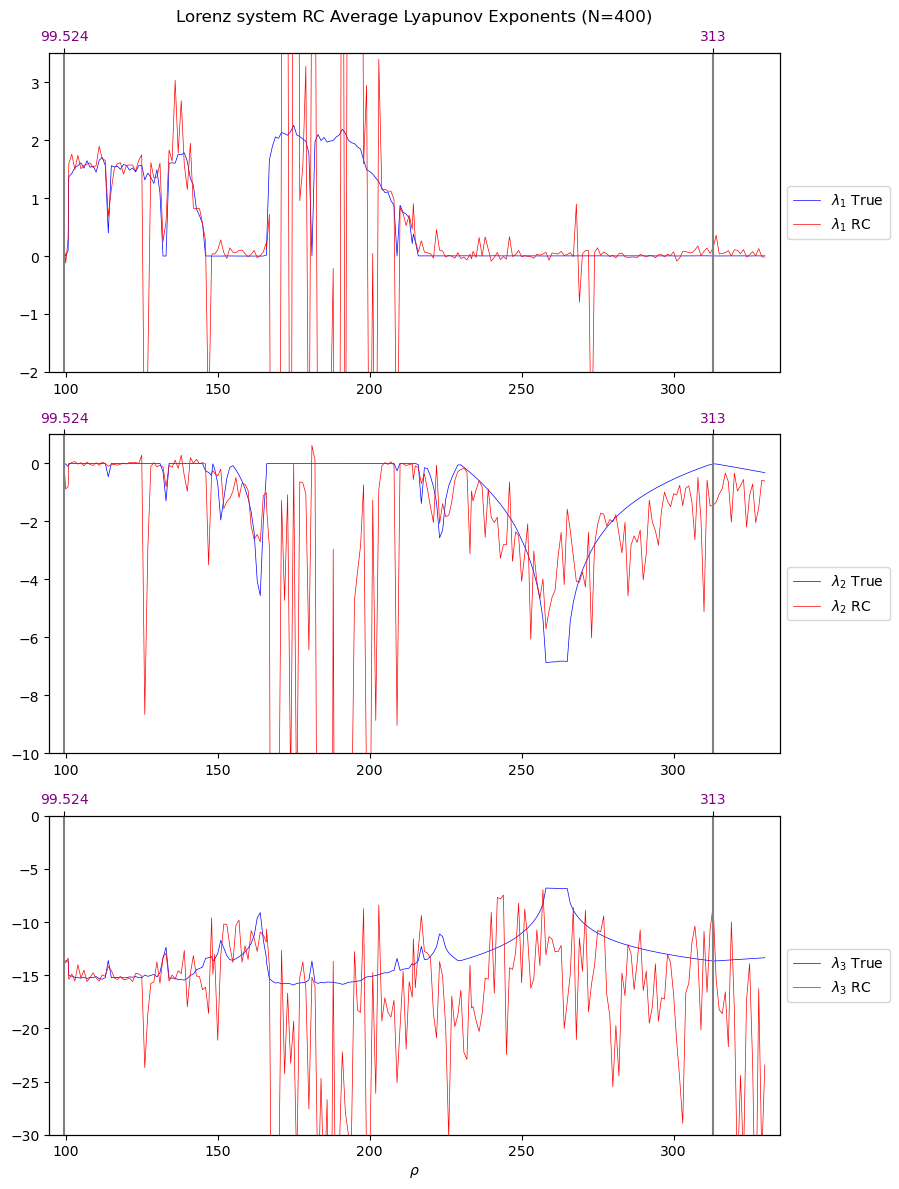

In [10]:
# Plot Lorenz system Lyapunov Exponents
fig, axs = plt.subplots(3, 1, figsize=(8, 12))  

axis_test_label_t = ["$\lambda_1$ True","$\lambda_2$ True","$\lambda_3$ True"]
axis_test_label   = ["$\lambda_1$ RC"  ,"$\lambda_2$ RC"  ,"$\lambda_3$ RC"  ]
axs[0].set_title("Lorenz system RC Average Lyapunov Exponents (N=" + str(N) + ")")

for i in range(D):
    axs[i].plot(rho_list, df_True_LE.iloc[:, [i+1]] , label= axis_test_label_t[i], color='blue' , lw = 0.5)
    axs[i].plot(rho_list, df_RC_LE_avg.iloc[:, [i+1]] , label= axis_test_label[i], color='red' , lw = 0.5)
    #axs[i].set_ylim(-20, 5)
    if i==0:
       axs[i].set_ylim(-2, 3.5)
    if i==1:
       axs[i].set_ylim(-10, 1)
    if i==2:
       axs[i].set_ylim(-30, 0)
    
    #
    # Shrink current axis by 20%
    box = axs[i].get_position()
    axs[i].set_position([box.x0, box.y0, box.width * 0.8, box.height])
    # Put a legend to the right of the current axis
    axs[i].legend(loc='center left', bbox_to_anchor=(1, 0.5))

    #axs[i].axvline(x = 13.926667, color = 'grey')
    #axs[i].axvline(x = 24.058   , color = 'grey')
    #axs[i].axvline(x = 470./19. , color = 'grey')
    #axs[i].axvline(x = 30.485   , color = 'grey')
    
    axs[i].axvline(x = 99.524   , color = 'grey')
    #axs[i].axvline(x = 100.795  , color = 'grey')
    #axs[i].axvline(x = 148.4    , color = 'grey')
    #axs[i].axvline(x = 166.07   , color = 'grey')
    #axs[i].axvline(x = 214.364  , color = 'grey')
    #axs[i].axvline(x = 233.5    , color = 'grey')
    axs[i].axvline(x = 313      , color = 'grey')
    axs[i].set_xlim(rho_from - 5,rho_to + 5)
    
    ax2 = axs[i].twiny()
    ax2.set_xlim(rho_from - 5,rho_to + 5)
    #
    ax2.set_xticks([99.524,313])
    ax2.set_xticklabels(['99.524','313'],color='purple')

    
axs[2].set_xlabel("$\\rho$") #\\rho need to prevent parsing error!!!
fig.tight_layout()

plt.savefig('climate/Average_LE_zoom_' + txt_range + '_noCLE_N' + str(N) + '.png',bbox_inches='tight')

plt.show()

plt.close(fig)

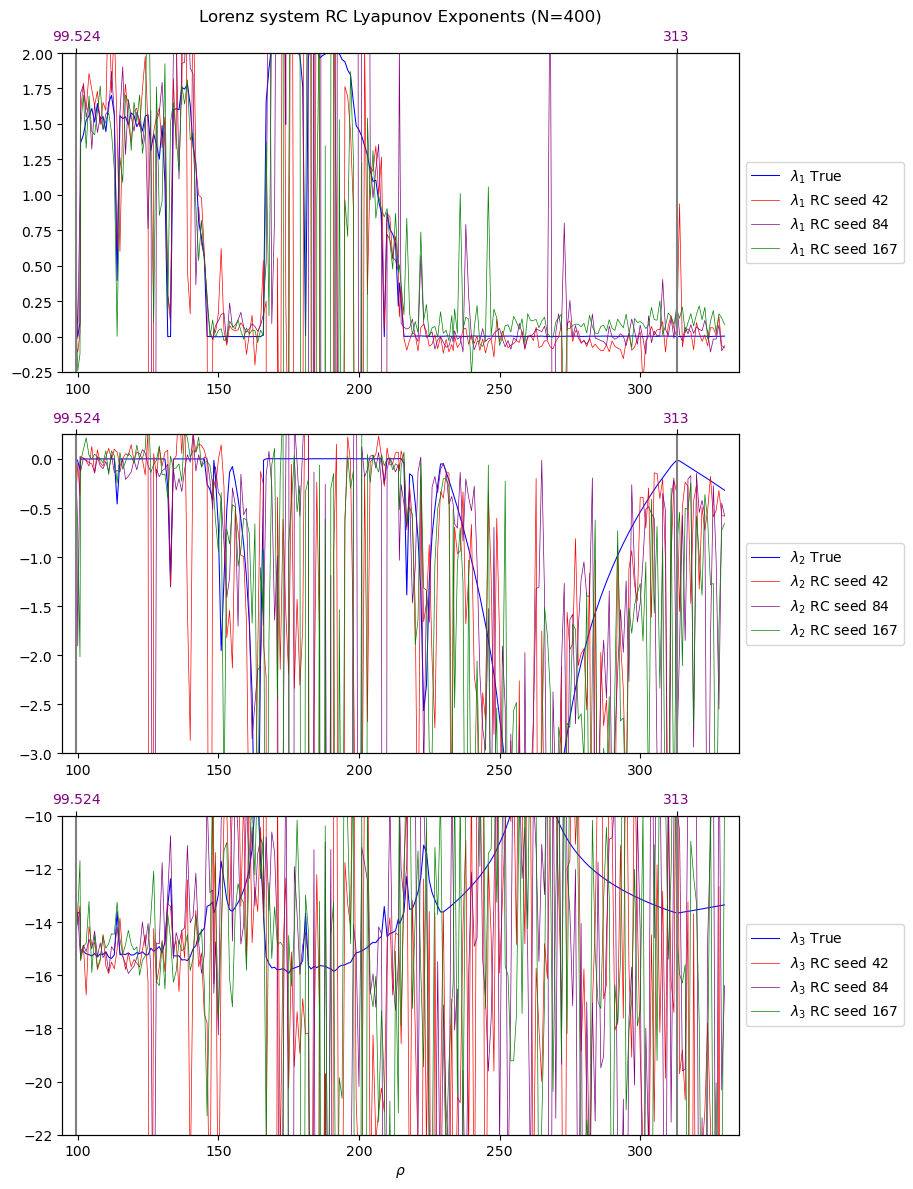

In [11]:
#######################################################################
# R. C .  A L L   L Y A P U N O V   E X P O N E N T S   
#######################################################################

# Plot Lorenz system Lyapunov Exponents
fig, axs = plt.subplots(3, 1, figsize=(8, 12))  

axis_test_label_t = ["$\lambda_1$ True","$\lambda_2$ True","$\lambda_3$ True"]
axis_test_label_42   = ["$\lambda_1$ RC seed 42"  ,"$\lambda_2$ RC seed 42"  ,"$\lambda_3$ RC seed 42"  ]
axis_test_label_84   = ["$\lambda_1$ RC seed 84"  ,"$\lambda_2$ RC seed 84"  ,"$\lambda_3$ RC seed 84"  ]
axis_test_label_167  = ["$\lambda_1$ RC seed 167"  ,"$\lambda_2$ RC seed 167"  ,"$\lambda_3$ RC seed 167"  ]
axs[0].set_title("Lorenz system RC Lyapunov Exponents (N=" + str(N) + ")") #with ylim

for i in range(D):
    axs[i].plot(rho_list, df_True_LE.iloc[:, [i+1]] , label= axis_test_label_t[i], color='blue' , lw = 0.75)
    axs[i].plot(rho_list, df_RC_LE.iloc[:, [i+1]] , label= axis_test_label_42[i], color='red' , lw = 0.5)
    axs[i].plot(rho_list, df_RC_LE_84.iloc[:, [i+1]] , label= axis_test_label_84[i], color='purple' , lw = 0.5)
    axs[i].plot(rho_list, df_RC_LE_167.iloc[:, [i+1]] , label= axis_test_label_167[i], color='green' , lw = 0.5)
    #axs[i].set_ylim(-20, 5)
    #
    if i==0:
       axs[i].set_ylim(-0.25, 2)
    if i==1:
       axs[i].set_ylim(-3, 0.25)
    if i==2:
       axs[i].set_ylim(-22,-10)
    
    # Shrink current axis by 20%
    box = axs[i].get_position()
    axs[i].set_position([box.x0, box.y0, box.width * 0.8, box.height])
    # Put a legend to the right of the current axis
    axs[i].legend(loc='center left', bbox_to_anchor=(1, 0.5))

    #axs[i].axvline(x = 13.926667, color = 'grey')
    #axs[i].axvline(x = 24.058   , color = 'grey')
    #axs[i].axvline(x = 470./19. , color = 'grey')
    #axs[i].axvline(x = 30.485   , color = 'grey')
    
    axs[i].axvline(x = 99.524   , color = 'grey')
    #axs[i].axvline(x = 100.795  , color = 'grey')
    #axs[i].axvline(x = 148.4    , color = 'grey')
    #axs[i].axvline(x = 166.07   , color = 'grey')
    #axs[i].axvline(x = 214.364  , color = 'grey')
    #axs[i].axvline(x = 233.5    , color = 'grey')
    axs[i].axvline(x = 313      , color = 'grey')
    axs[i].set_xlim(rho_from - 5,rho_to + 5)
    
    ax2 = axs[i].twiny()
    ax2.set_xlim(rho_from - 5,rho_to + 5)
    #
    ax2.set_xticks([99.524,313])
    ax2.set_xticklabels(['99.524','313'],color='purple')
    
axs[2].set_xlabel("$\\rho$") #\\rho need to prevent parsing error!!!
fig.tight_layout()

plt.savefig('climate/All_seeds_LE_zoom_' + txt_range + '_noCLE_N' + str(N) + '.png',bbox_inches='tight')

plt.show()

plt.close(fig)

In [12]:
#---------------------------------------------------------------------#---------------------------------------------------------------------#
# Elapsed time
#---------------------------------------------------------------------#
print(f'\nElapsed time {time.time() - start_time:6.2e} s')


Elapsed time 1.15e+01 s
